In [1]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 8.2MB 7.7MB/s 


In [2]:
import json
import networkx as nx
import pymorphy2
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
analyzer = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
with open("new_corpus.json") as f:
    corpus = json.load(f)

Проводим предобработку, включающую токенизацию, лемматизацию,
нормализацию и удаление стоп-слов


In [4]:
punct = string.punctuation + "—" + "«" + "»"
tokens = []
for documents in corpus.values():
    documents_token = documents.split()
    for x in documents_token:
      if x not in punct:
        tokens.append(x)

In [69]:
stopwords_list = stopwords.words("russian")
count = 0
wout_sw = []
for word in tokens:
  if word.lower() not in stopwords_list:
    normal_word = analyzer.parse(word)[0]
    if normal_word.tag.POS == 'NOUN':
      wout_sw.append(normal_word.normal_form)
      count += 1

In [70]:
wout_sw[:15]

['северодвинск',
 'город',
 'область',
 'центр',
 'образование',
 'год',
 'рабочий',
 'статус',
 'город',
 'год',
 'статус',
 'город',
 'доблесть',
 'распоряжение',
 'правительство']

In [71]:
count # количество слов, которые нам подходят для построения графа

5810

In [36]:
from collections import Counter

In [37]:
word_count = dict(Counter(wout_sw))

In [38]:
word_count = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)}

In [72]:
word_count

{'год': 227,
 'центр': 79,
 'область': 75,
 'район': 60,
 'часть': 59,
 'город': 56,
 'россия': 52,
 'состав': 50,
 'территория': 47,
 'образование': 45,
 'население': 42,
 'государство': 37,
 'война': 37,
 'река': 35,
 'страна': 34,
 'единица': 33,
 'земля': 30,
 'север': 30,
 'статус': 27,
 'остров': 26,
 'антициклон': 25,
 'округ': 24,
 'ссср': 24,
 'совет': 24,
 'компания': 23,
 'число': 22,
 'площадь': 22,
 'отношение': 22,
 'период': 21,
 'федерация': 19,
 'республика': 19,
 'начало': 19,
 'флот': 18,
 'век': 18,
 'посёлок': 17,
 'член': 17,
 'место': 17,
 'система': 17,
 'вода': 17,
 'база': 17,
 'великобритания': 16,
 'море': 16,
 'субъект': 15,
 'пункт': 15,
 'организация': 15,
 'точка': 15,
 'москва': 15,
 'регион': 14,
 'ход': 14,
 'королевство': 14,
 'уровень': 14,
 'сентябрь': 14,
 'связь': 14,
 'мир': 14,
 'википедия': 14,
 'высота': 14,
 'правительство': 13,
 'сила': 13,
 'архангельск': 13,
 'название': 13,
 'конец': 13,
 'км': 13,
 'берег': 13,
 'иван': 13,
 'правило': 

Чтобы граф был читаемый, выберем 10 самых популярных слов и отобразим их

In [79]:
top_words = list(word_count.keys())[:15]
count = list(word_count.values())[:15]

In [80]:
import matplotlib.pyplot as plt

In [81]:
count = list(map(lambda x: x*10, count))

In [82]:
edges = [] # ребра
for word in top_words:
    for second_word in top_words:
        count = 0
        if word != second_word:
            for doc in list(corpus.values()):
                if word in doc and second_word in doc:
                    count += 1
            edges.append((word, second_word, count))
edges = [edge for edge in edges if edge[2] >= 2]

In [83]:
len(edges)

130

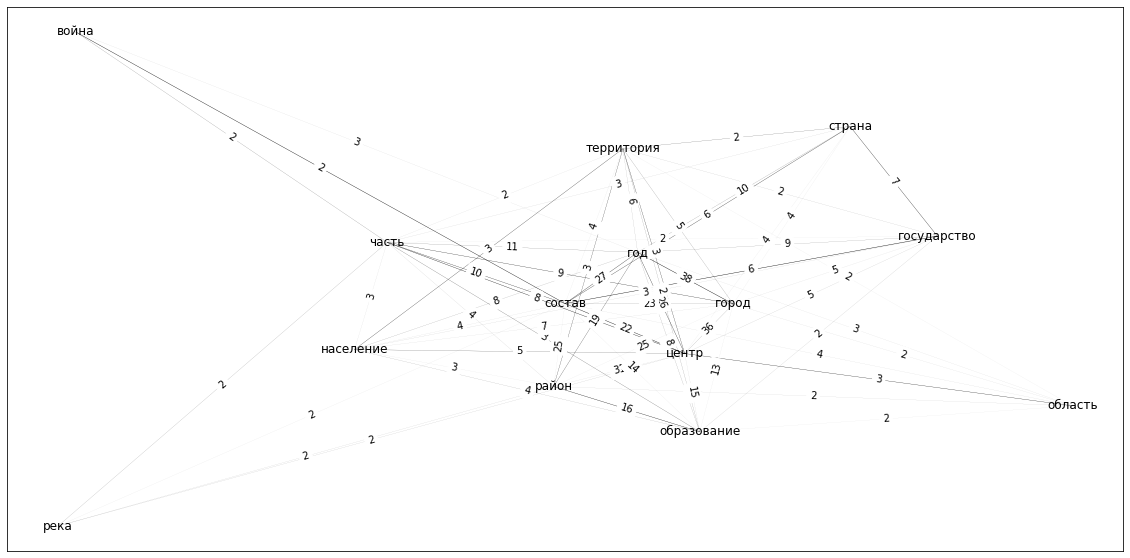

In [84]:
G = nx.Graph()
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
labels = {}
for i in edges:
    labels[(i[0],i[1])] = i[2]
widths = list(map(lambda x: x*0.01, list(labels.values())))
plt.figure(figsize = (20,10))
nx.draw_networkx(G, pos,  node_size = count, with_labels = True, width = widths)
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = labels)
plt.show()

Чаще всего встречаются слова, напрямую связанные с темой города (территория, район, центр, население, область, государство, страна, состав, часть), с окружающей средой (река), с социальным институтом (образование) и с историческим событием (война) 